# Introduction to Machine Learning - Exercise 4
Goal of the excercise is to learn how to use Scikit-learn library for a regression tasks employing various linear regression models and moreover evaluate the performance of the proposed models.

![meme01](https://github.com/rasvob/EFREI-Introduction-to-Machine-Learning/blob/main/images/fml_10_meme_01.jpeg?raw=true)

## 📌 Useful URLs

### Models
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet

### Preprocessing
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

In [2]:
"""
Computes MAPE
"""
def mean_absolute_percentage_error(y_true: np.array, y_pred: np.array) -> float:
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def compute_metrics(df: pd.DataFrame) -> pd.DataFrame:
    y_true, y_pred = df['y_true'].values, df['y_pred'].values
    return compute_metrics_raw(y_true, y_pred)

def compute_metrics_raw(y_true: pd.Series, y_pred: pd.Series) -> pd.DataFrame:
    mae, mse, rmse, mape = mean_absolute_error(y_true=y_true, y_pred=y_pred), mean_squared_error(y_true=y_true, y_pred=y_pred), np.sqrt(mean_squared_error(y_true=y_true, y_pred=y_pred)), mean_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
    return pd.DataFrame.from_records([{'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'MAPE': mape}], index=[0])

## Petrol Consumption Dataset
https://www.kaggle.com/datasets/harinir/petrol-consumption

### 🎯 Our goal is to build a regression model for prediction of petrol consumption in the 48 USA states.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/rasvob/EFREI-Introduction-to-Machine-Learning/main/datasets/petrol_consumption.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


## Is each column numerical?

In [4]:
df.dtypes

,0
Petrol_tax,float64
Average_income,int64
Paved_Highways,int64
Population_Driver_licence(%),float64
Petrol_Consumption,int64


## Do we have any missing data?

In [5]:
df.isna().sum()

,0
Petrol_tax,0
Average_income,0
Paved_Highways,0
Population_Driver_licence(%),0
Petrol_Consumption,0


# 📊 Let's start with a simple EDA

* 🔎 Can you see any relationships among the features from the pairplot?
    * What should we look for?
* 🔎 Do you think that the features are normally distributed?

<Figure size 1200x1200 with 0 Axes>

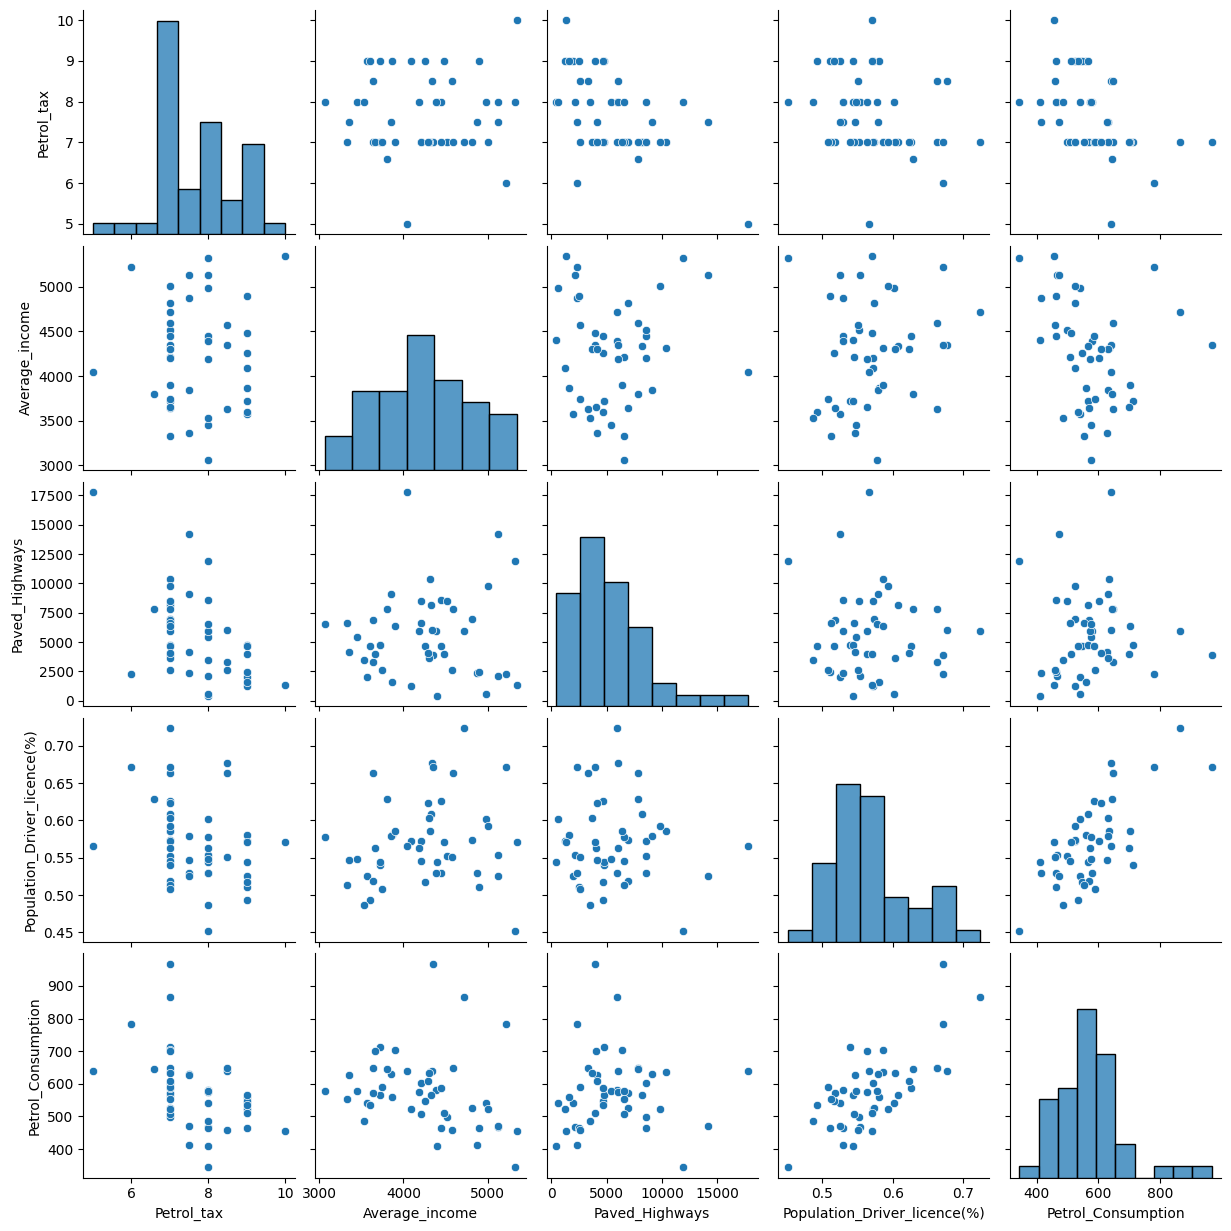

In [6]:
fig = plt.figure(figsize=(12, 12))
sns.pairplot(df)
fig.show()

## Always look for a simple trend-like patters first 🙂
> ## **Trend is your friend** 😀

![meme02](https://github.com/rasvob/EFREI-Introduction-to-Machine-Learning/blob/main/images/fml_10_meme_02.png?raw=true)

## What about the a correlation coefficients?
* 🔎 What row/column is the most important from the heatmap?
    * Why?
* 🔎 Are correlations among **independent variables** good or bad?

<Axes: >

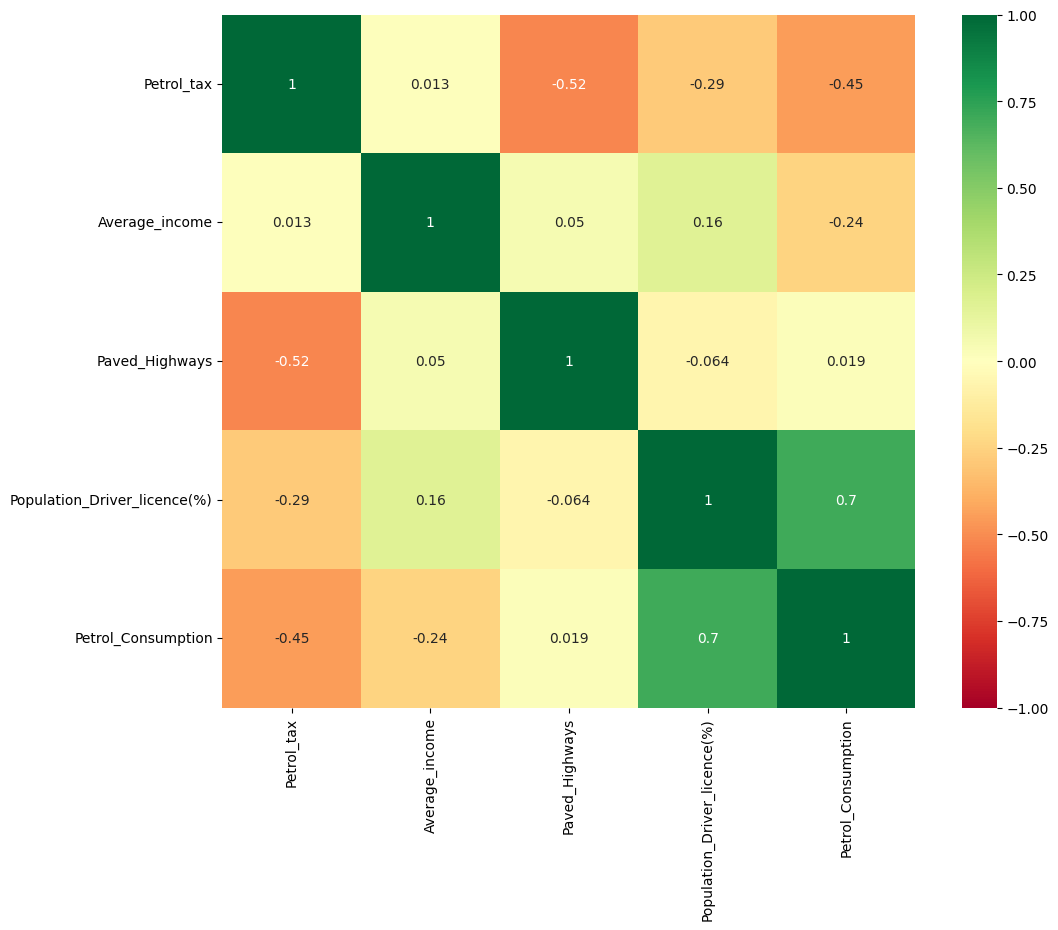

In [7]:
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), square=True, cmap='RdYlGn', vmin=-1, vmax=1, annot=True)

## Can you see any outliers in the data?
* What about skewness or variance differences?

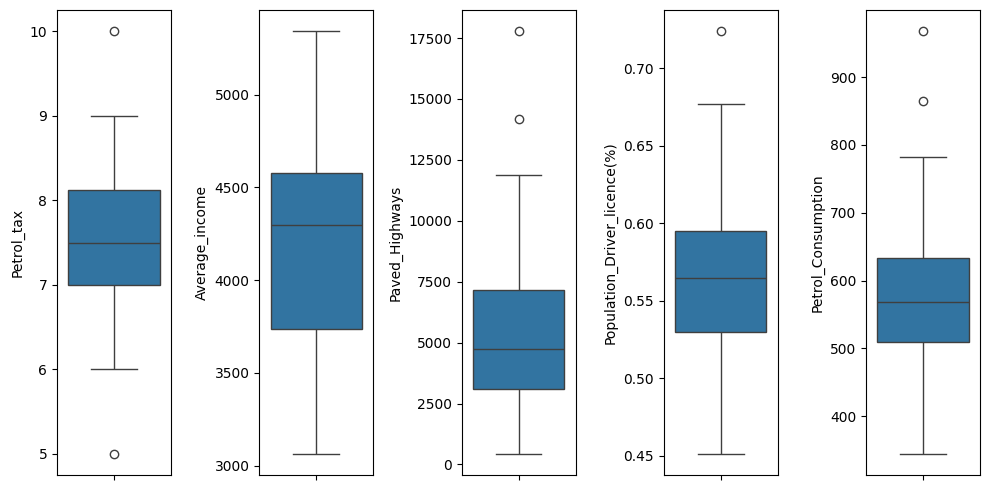

In [8]:
fig, axes = plt.subplots(1, df.shape[1], figsize=(10, 5))

for i, col in enumerate(df.columns):
    ax = axes.flatten()[i]
    sns.boxplot(data=df, y=col, ax=ax)

fig.tight_layout()

# 🚀 Let's build our first simple regression models with just 2 variables and compare them
* We will split the data into train/test set
* Then we can build the models and evaluate them

### There are many metrics used for the perormance evaluation
* MAE, RMSE, MAPE, R2, etc.
    * Do you know what these abbr. mean?
* 🔎 **Do we want these metrics to go lower or higher?**
    * Is it the same direction as in classification tasks, e.g. F1-Score, or opposite way around?
* 💡 You can take a look at these blog posts:
    * [this](https://towardsdatascience.com/regression-an-explanation-of-regression-metrics-and-what-can-go-wrong-a39a9793d914)
    * or [this](https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/) for more details

## Create `X` and `y` dataframes

In [10]:
X = df.drop('Petrol_Consumption', axis=1)
y = df['Petrol_Consumption']



In [14]:
X
y

,Petrol_Consumption
0,541
1,524
2,561
3,414
4,410
5,457
6,344
7,467
8,464
9,498


## Split the data in ration 80:20

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 38 samples
Test set size: 10 samples


# ⚡ The 1st model will be the simplest one
* We will choose only one feature for the model - *Population_Driver_licence(%)*
    * 🔎 Why did we chose this specific feature?

In [19]:
alg = LinearRegression()
alg.fit(pd.DataFrame(X_train[['Population_Driver_licence(%)']]), y_train)

LinearRegression()

In [20]:
y_pred = alg.predict(pd.DataFrame(X_test[['Population_Driver_licence(%)']]))

## 🔎 How would the regression line formula look like?
* 💡 What is a general equation of straight line in 2D? And for nD?

In [23]:
alg.coef_, alg.intercept_

(array([1523.29090316]), np.float64(-288.6445224588457))

# 💡 Very simple visual check of prediction quality is `y_test vs. y_pred` scatter plot
* What is an ideal result?

<Axes: xlabel='Petrol_Consumption'>

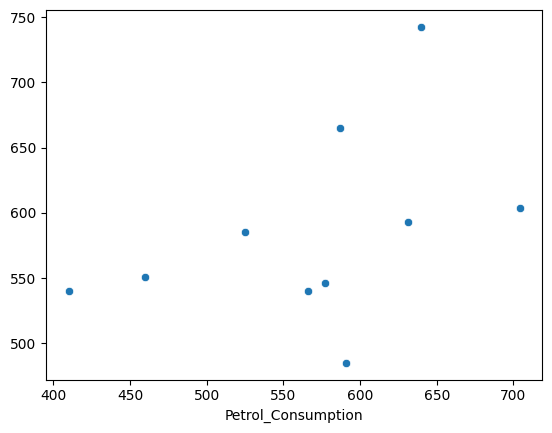

In [24]:
sns.scatterplot(x=y_test, y=y_pred)

# However it is always better to quantify the errors 😊
* 💡MAPE or SMAPE uses percentage values, thus these might be easier to understand to non-expert audience
* 💡MAE, RMSE are in the same units as the predicted variable
    * Always take a look at basic statistical properties (typical value range, variance or use box-plot ) to rationalize the amount of error according to the range or the variable
    * 📌 e.g., MAE = 10 can be low for variable in <1000, 5000> range but very high for variable in <0, 50> range

<Axes: >

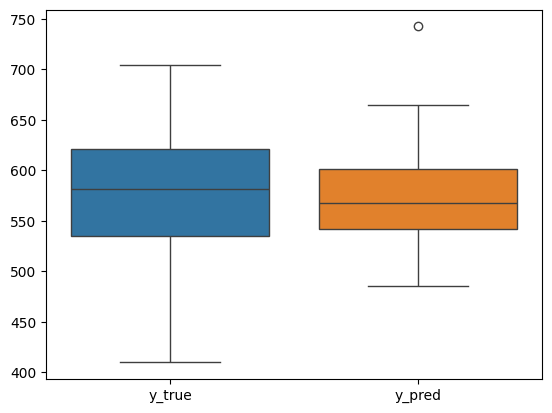

In [25]:
sns.boxplot(data=pd.DataFrame({'y_true': y_test, 'y_pred': y_pred}))

## So what do you think about the error?
* 💡 Is model completely off or is it roughly right?

In [27]:
compute_metrics(pd.DataFrame({'y_true': y_test, 'y_pred': y_pred}))

,MAE,MSE,RMSE,MAPE
0,76.232122,6966.618302,83.46627,14.032421


# ⚡ 2nd model will use just one variable again, however now it will be an uncorrelated one
* 🎯 We want to compare the model with the 1st one

In [32]:
alg = LinearRegression()
alg.fit(pd.DataFrame(X_train['Paved_Highways']), y_train)
y_pred = alg.predict(pd.DataFrame(X_test['Paved_Highways']))

## Let's take a look at the scatterplot of y_test vs. y_pred now

<Axes: xlabel='Petrol_Consumption'>

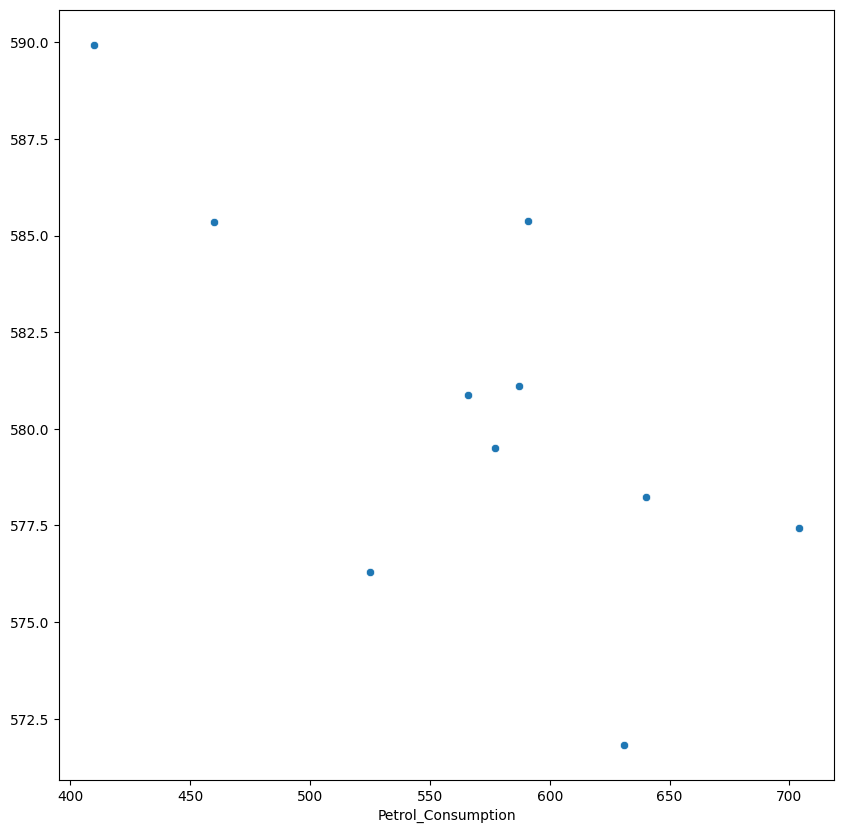

In [33]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred)

## 🔎 Which one of the two models is better and why?

In [34]:
compute_metrics(pd.DataFrame({'y_true': y_test, 'y_pred': y_pred}))

,MAE,MSE,RMSE,MAPE
0,63.300334,7434.798483,86.225278,12.293599


# The obvious next step is using more than one feature in the model, so let's get to it! 👊
* The API is the same, we will just include every feature in the model instead of just one

In [35]:
alg = LinearRegression()
alg.fit(X_train, y_train)
y_pred = alg.predict(X_test)

## How would the regression line formula look like now?

In [36]:
alg.coef_, alg.intercept_

(array([-3.69937459e+01, -5.65355145e-02, -4.38217137e-03,  1.34686930e+03]),
 np.float64(361.45087906653225))

## 📊 For MLR we usually also want to take a look at coefficients values so we can "explain" the decisions by the model
* 🔎 Are all the features used?
* 🔎 Is there any feature much more important than other features?

([0, 1, 2, 3],
 [Text(0, 0, 'Petrol_tax'),
  Text(1, 0, 'Average_income'),
  Text(2, 0, 'Paved_Highways'),
  Text(3, 0, 'Population_Driver_licence(%)')])

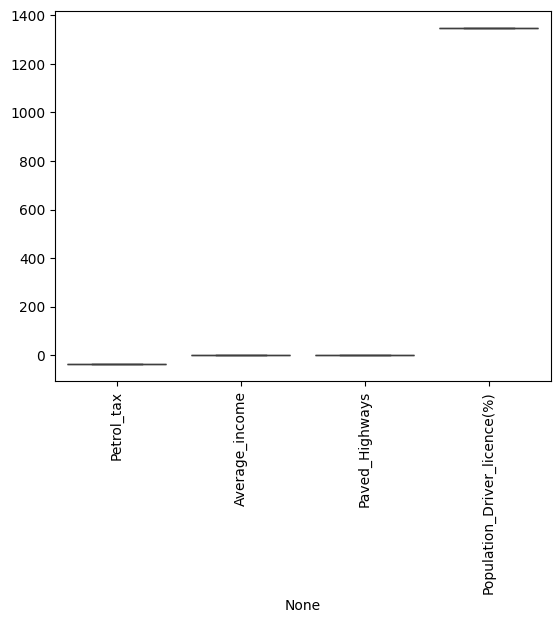

In [37]:
sns.boxplot(x=X_train.columns, y = alg.coef_)
plt.xticks(rotation=90)

## 🔎 Is the model better than the 1st one with just one feature?
* How different are the results?

In [38]:
compute_metrics(pd.DataFrame({'y_true': y_test, 'y_pred': y_pred}))

,MAE,MSE,RMSE,MAPE
0,53.468541,4083.255872,63.900359,10.250194


## 🔎 Is it wise to have a model with some coefficient of few magnitudes higher values than other coefficients?
* What can go wrong?
*  What is a **colinearity?**
    * Why it may become an issue for regression models?

![meme03](https://github.com/rasvob/EFREI-Introduction-to-Machine-Learning/blob/main/images/fml_10_meme_03.jpg?raw=true)

# There are method for dealing with of these issues
* It is called regularization
    * We have two types of it - **L1 (Lasso)** and **L2 (Ridge)**
    * What is the difference between them?
* How is the regularization used?
    * What do we change in the model?

* Very nice comparison of both methods is at https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression

# Let's try L1 - Lasso first
* 💡 The most important parameter is the `alpha` value
* Higher alpha means that the regularization will be more strict

In [39]:
alg = Lasso(alpha=1.0, random_state=13)
alg.fit(X_train, y_train)
y_pred = alg.predict(X_test)

## 💡 Notice the values of coefficients

In [40]:
compute_metrics(pd.DataFrame({'y_true': y_test, 'y_pred': y_pred}))

,MAE,MSE,RMSE,MAPE
0,53.423468,4670.428228,68.340531,10.491414


# We can use L2 - Ridge in the same way

In [41]:
alg = Ridge(alpha=1.0, random_state=13)
alg.fit(X_train, y_train)
y_pred = alg.predict(X_test)

### 🔎 Regardless the used model, what is the difference among the coefficients values with enabled and disabled regularization?

# 💡 There are usually differences among the variables ranges
* This may bring some difficulties in the coefficient optimization process
* 💡 If the ranges are similar, the optimization process should be a lot easier
    * Why?
* Due to that, we usually use `MinMaxScaler` or `StandardScaler` before we try to fit a linear regression model
    * We are not limited to these two preprocessing methods

# 🚀 We will try to fit the Lasso model again, but this time with scaled features

### 🔎 Why do we fit the scaler only on the training part of the data?

In [42]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

### Try 0.1, 1 and 10 for alpha parameter
* What is different for each run?

In [45]:
result = []

for alpha in [0.1, 1, 10]:
  alg = Lasso(alpha=alpha, random_state=13)
  alg.fit(X_train_scaled, y_train)
  y_pred = alg.predict(X_test_scaled)
  result.append((alpha, y_pred, alg.coef_))

result

[(0.1,
  array([606.78810841, 673.59275283, 584.93718488, 563.1693981 ,
         519.10521282, 643.30717274, 572.90414545, 687.25034573,
         547.40668004, 530.19217563]),
  array([-36.43501335, -33.59783391, -15.86992298,  76.8095113 ])),
 (1,
  array([607.67887385, 671.89118985, 584.46799796, 559.79298216,
         519.52502162, 641.91096415, 572.93571021, 688.88880827,
         545.54283117, 531.63665506]),
  array([-34.54375099, -32.87060933, -13.97693563,  76.6978699 ])),
 (10,
  array([611.81237704, 656.93595908, 578.78783049, 533.91623014,
         525.95249008, 628.34045638, 574.35662554, 698.498786  ,
         533.84400227, 542.96803121]),
  array([-19.0494534 , -24.91628546,  -0.        ,  73.69861413]))]

In [46]:
df.result = pd.DataFrame(index = [0.1, 1.0, 10], columns = ['MAE', 'MSE', 'RMSE', 'MAPE'])

for i, x in enumerate(result):
  df.result.iloc[i] = compute_metrics_raw(y_test, x[1]).iloc[0]

df.result

/tmp/ipython-input-473074445.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.result = pd.DataFrame(index = [0.1, 1.0, 10], columns = ['MAE', 'MSE', 'RMSE', 'MAPE'])


,MAE,MSE,RMSE,MAPE
0.1,53.473947,4078.930564,63.866506,10.249134
1.0,53.523208,4041.896101,63.575908,10.239209
10.0,54.43386,4032.104679,63.498856,10.282505


## 🔎 How are the models and results different?

# ✅ Task
* We are obviously not limited to only a linear regression models for the regression tasks
    * Usually there is a regression alternative for most of the classification models in Sk-Learn
* Use [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) for the data and compare it to the Linear regression model
* Use [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) model
    * The model combines the L1 and L2 regularization
    * Study how the model works
    * The model has 2 important parameters `alpha` and `l1_ratio`
    * Try to tune them - i.e. try various combinations and plot the results (you can plot MAE or MSE for different `alpha` and `l1_ratio` values)
* Compare the `KNeighborsRegressor` and `ElasticNet` models - which of them was more precise?

In [47]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet


In [48]:
results_knn = []

for k in [2, 3, 5, 7, 10]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    metrics = compute_metrics_raw(y_test, y_pred)
    metrics['k'] = k
    results_knn.append(metrics)

df_knn = pd.concat(results_knn, ignore_index=True)
df_knn.set_index('k', inplace=True)
df_knn


,MAE,MSE,RMSE,MAPE
k,,,,
2,53.650000,5154.175000,71.792583,9.339669
3,65.533333,6302.333333,79.387237,11.239198
5,59.540000,4611.084000,67.904963,10.493833
7,50.557143,3381.389796,58.149719,9.313428
10,43.690000,2994.611000,54.723039,8.250118


In [49]:
alphas = [0.01, 0.1, 1, 10]
l1_ratios = [0.1, 0.5, 0.9]

results_elastic = []

for alpha in alphas:
    for l1 in l1_ratios:
        model = ElasticNet(alpha=alpha, l1_ratio=l1, random_state=13)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        metrics = compute_metrics_raw(y_test, y_pred)
        metrics['alpha'] = alpha
        metrics['l1_ratio'] = l1
        results_elastic.append(metrics)

df_elastic = pd.concat(results_elastic, ignore_index=True)
df_elastic


,MAE,MSE,RMSE,MAPE,alpha,l1_ratio
0,53.411441,4081.060614,63.883179,10.244402,0.01,0.1
1,53.436950,4081.824976,63.889162,10.246940,0.01,0.5
2,53.462609,4082.655910,63.895664,10.249476,0.01,0.9
3,52.928785,4074.551518,63.832214,10.192583,0.10,0.1
4,53.162432,4073.417949,63.823334,10.217651,0.10,0.5
5,53.409765,4077.171213,63.852731,10.242883,0.10,0.9
6,50.804104,4468.951375,66.850216,9.964443,1.00,0.1
7,51.125852,4230.296948,65.040733,9.975644,1.00,0.5
8,52.909436,4048.497306,63.627803,10.180007,1.00,0.9
9,57.002643,6128.459726,78.284479,11.087840,10.00,0.1


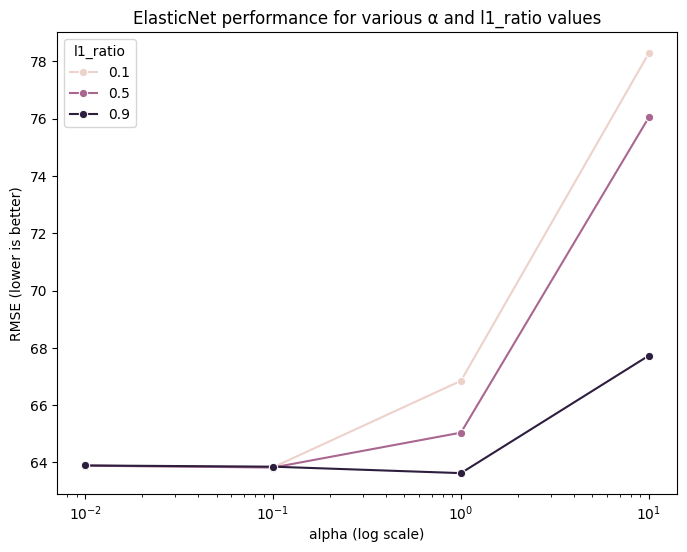

In [50]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df_elastic, x='alpha', y='RMSE', hue='l1_ratio', marker='o')
plt.xscale('log')
plt.title('ElasticNet performance for various α and l1_ratio values')
plt.ylabel('RMSE (lower is better)')
plt.xlabel('alpha (log scale)')
plt.show()


In [53]:
best_knn = df_knn.loc[df_knn['RMSE'].idxmin()]
best_elastic = df_elastic.loc[df_elastic['RMSE'].idxmin()]

best_knn


,10
MAE,43.690000
MSE,2994.611000
RMSE,54.723039
MAPE,8.250118


In [52]:
best_elastic

,8
MAE,52.909436
MSE,4048.497306
RMSE,63.627803
MAPE,10.180007
alpha,1.000000
l1_ratio,0.900000
